In [254]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import community
import numpy as np
from datetime import datetime



In [255]:
df = pd.read_csv('../data/processed/monthly_TradeData.csv')
df.head()

# Convert the "Period" column to a string
df['Period'] = df['Period'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545537 entries, 0 to 545536
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Period        545537 non-null  object 
 1   ReporterISO   545537 non-null  object 
 2   ReporterDesc  545537 non-null  object 
 3   PartnerISO    545537 non-null  object 
 4   PartnerDesc   545537 non-null  object 
 5   PrimaryValue  545537 non-null  float64
dtypes: float64(1), object(5)
memory usage: 25.0+ MB


In [256]:
# Show the count of record in each year
df['Period'].value_counts()

df['Period'].unique()

array(['200101', '200102', '200103', '200104', '200105', '200106',
       '200107', '200108', '200109', '200110', '200111', '200112',
       '201501', '201502', '201503', '201504', '201505', '201506',
       '201507', '201508', '201509', '201510', '201511', '201512',
       '201401', '201402', '201403', '201404', '201405', '201406',
       '201407', '201408', '201409', '201410', '201411', '201412',
       '200001', '200002', '200003', '200004', '200005', '200006',
       '200007', '200008', '200009', '200010', '200011', '200012',
       '201601', '201602', '201603', '201604', '201605', '201606',
       '201607', '201608', '201609', '201610', '201611', '201612',
       '200203', '200204', '200206', '200207', '200208', '200209',
       '200210', '200212', '200211', '200205', '200202', '200201',
       '200301', '200302', '200303', '200304', '200305', '200306',
       '200307', '200308', '200309', '200310', '200311', '200312',
       '201701', '201702', '201703', '201704', '201705', '2017

In [257]:

# Initialize an empty dictionary to store subsets
network_sets = {}

# Iterate through unique periods and create subsets
for period in df['Period'].unique():
    subset_name = f"period_{period}"
    network_subset = df[df['Period'] == period].copy()  # Assuming 'df' is a directed graph
    G_subset = nx.from_pandas_edgelist(network_subset, 'ReporterISO', 'PartnerISO', ['PrimaryValue'], create_using=nx.Graph())
    network_sets[subset_name] = G_subset
    
network_sets

{'period_200101': <networkx.classes.graph.Graph at 0x14df24280>,
 'period_200102': <networkx.classes.graph.Graph at 0x28597c430>,
 'period_200103': <networkx.classes.graph.Graph at 0x28593e460>,
 'period_200104': <networkx.classes.graph.Graph at 0x166dab730>,
 'period_200105': <networkx.classes.graph.Graph at 0x2a8fddca0>,
 'period_200106': <networkx.classes.graph.Graph at 0x2a8fdd340>,
 'period_200107': <networkx.classes.graph.Graph at 0x14df24bb0>,
 'period_200108': <networkx.classes.graph.Graph at 0x14df242e0>,
 'period_200109': <networkx.classes.graph.Graph at 0x2a8fdd880>,
 'period_200110': <networkx.classes.graph.Graph at 0x2a8fdd6a0>,
 'period_200111': <networkx.classes.graph.Graph at 0x2a8fdd790>,
 'period_200112': <networkx.classes.graph.Graph at 0x14df24f40>,
 'period_201501': <networkx.classes.graph.Graph at 0x14df24c10>,
 'period_201502': <networkx.classes.graph.Graph at 0x2a8fe64c0>,
 'period_201503': <networkx.classes.graph.Graph at 0x2a8fe67c0>,
 'period_201504': <networ

### Plot for network structure over time

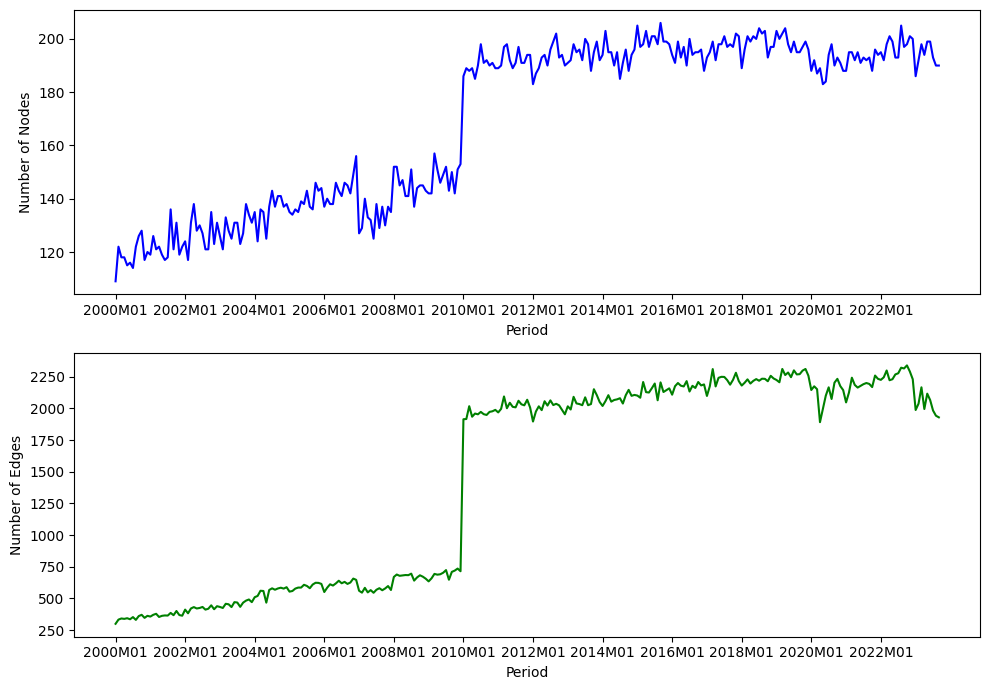

In [258]:
# Initialize lists to store the number of nodes and edges
num_nodes_list = []
num_edges_list = []

# Iterate through the subsets
for subset_name, subset_graph in network_sets.items():
    # Extract the year and month from the subset name
    period = int(subset_name.split('_')[1])
    year = period // 100
    month = period % 100
    period_str = f"{year}M{month:02d}"
    
    # Append the number of nodes and edges to the lists
    num_nodes_list.append((period_str, subset_graph.number_of_nodes()))
    num_edges_list.append((period_str, subset_graph.number_of_edges()))

# Sort the lists based on the period
num_nodes_list.sort(key=lambda x: x[0])
num_edges_list.sort(key=lambda x: x[0])

# Create two plots for the number of nodes and number of edges
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

# Plot for the number of nodes
ax1.plot(*zip(*num_nodes_list), linestyle='-', color='blue')
ax1.set_xlabel('Period')
ax1.set_ylabel('Number of Nodes')

# Plot for the number of edges
ax2.plot(*zip(*num_edges_list), linestyle='-', color='green')
ax2.set_xlabel('Period')
ax2.set_ylabel('Number of Edges')

# Show labels for every 24 periods
x_ticks = num_nodes_list[::24]
ax1.set_xticks([x[0] for x in x_ticks])
ax2.set_xticks([x[0] for x in x_ticks])

plt.tight_layout()
plt.show()

In [259]:
num_nodes_list

[('2000M01', 109),
 ('2000M02', 122),
 ('2000M03', 118),
 ('2000M04', 118),
 ('2000M05', 115),
 ('2000M06', 116),
 ('2000M07', 114),
 ('2000M08', 122),
 ('2000M09', 126),
 ('2000M10', 128),
 ('2000M11', 117),
 ('2000M12', 120),
 ('2001M01', 119),
 ('2001M02', 126),
 ('2001M03', 121),
 ('2001M04', 122),
 ('2001M05', 119),
 ('2001M06', 117),
 ('2001M07', 118),
 ('2001M08', 136),
 ('2001M09', 121),
 ('2001M10', 131),
 ('2001M11', 119),
 ('2001M12', 122),
 ('2002M01', 124),
 ('2002M02', 117),
 ('2002M03', 131),
 ('2002M04', 138),
 ('2002M05', 128),
 ('2002M06', 130),
 ('2002M07', 127),
 ('2002M08', 121),
 ('2002M09', 121),
 ('2002M10', 135),
 ('2002M11', 123),
 ('2002M12', 131),
 ('2003M01', 126),
 ('2003M02', 121),
 ('2003M03', 133),
 ('2003M04', 128),
 ('2003M05', 125),
 ('2003M06', 131),
 ('2003M07', 131),
 ('2003M08', 123),
 ('2003M09', 127),
 ('2003M10', 138),
 ('2003M11', 134),
 ('2003M12', 131),
 ('2004M01', 135),
 ('2004M02', 124),
 ('2004M03', 136),
 ('2004M04', 135),
 ('2004M05',

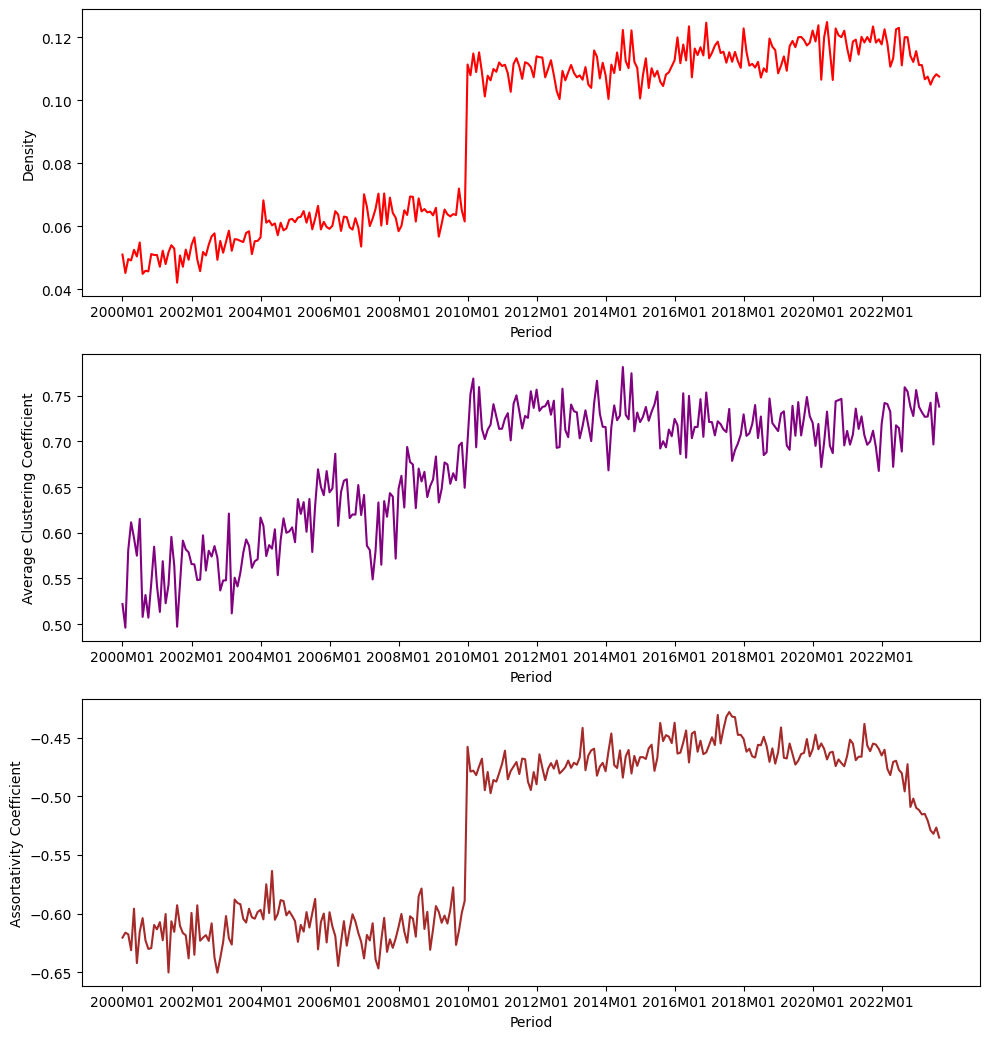

In [262]:

# Assume network_sets is defined elsewhere in your code
# network_sets = ...

# Initialize lists to store the metrics
density_list = []
avg_clustering_list = []
assortativity_list = []

# Iterate through the subsets
for subset_name, subset_graph in network_sets.items():
    # Extract the year and month from the subset name
    period = int(subset_name.split('_')[1])
    year = period // 100
    month = period % 100
    period_str = f"{year}M{month:02d}"
    
    # Calculate the metrics and append to the lists
    density_list.append((period_str, nx.density(subset_graph)))
    avg_clustering_list.append((period_str, nx.average_clustering(subset_graph)))
    assortativity_list.append((period_str, nx.degree_assortativity_coefficient(subset_graph)))

# Sort the lists based on the period
density_list.sort(key=lambda x: x[0])
avg_clustering_list.sort(key=lambda x: x[0])
assortativity_list.sort(key=lambda x: x[0])

# Create subplots for the metrics
fig, axs = plt.subplots(3, 1, figsize=(10, 10.5))

# Plot for density
axs[0].plot(*zip(*density_list), linestyle='-', color='red')
axs[0].set_xlabel('Period')
axs[0].set_ylabel('Density')

# Plot for average clustering coefficient
axs[1].plot(*zip(*avg_clustering_list), linestyle='-', color='purple')
axs[1].set_xlabel('Period')
axs[1].set_ylabel('Average Clustering Coefficient')

# Plot for assortativity coefficient
axs[2].plot(*zip(*assortativity_list), linestyle='-', color='brown')
axs[2].set_xlabel('Period')
axs[2].set_ylabel('Assortativity Coefficient')

# Show labels for every 24 periods
x_ticks = density_list[::24]
for ax in axs:
    ax.set_xticks([x[0] for x in x_ticks])

plt.tight_layout()
plt.show()


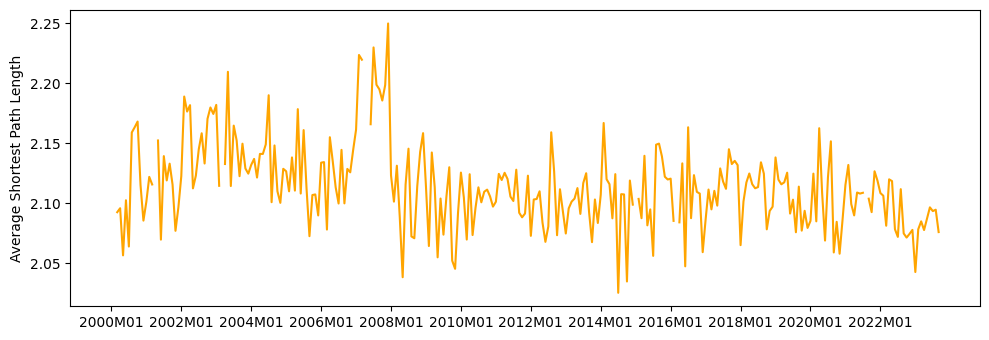

In [263]:
# Initialize lists to store the metrics
avg_shortest_path_list = []

# Iterate through the subsets
for subset_name, subset_graph in network_sets.items():
    # Extract the year and month from the subset name
    period = int(subset_name.split('_')[1])
    year = period // 100
    month = period % 100
    period_str = f"{year}M{month:02d}"
    
    # Calculate the metrics and append to the lists
    # Check if the graph is connected before computing average shortest path
    if nx.is_connected(subset_graph):
        avg_shortest_path_list.append((period_str, nx.average_shortest_path_length(subset_graph)))
    else:
        avg_shortest_path_list.append((period_str, None))  # Mark as missing value for disconnected graphs
    
# Sort the lists based on the period
avg_shortest_path_list.sort(key=lambda x: x[0])

# Create a plot for average shortest path
fig, ax = plt.subplots(figsize=(10, 3.5))

# Plot for average shortest path length (considering missing values)
avg_shortest_path_values = [value if value is not None else float('nan') for _, value in avg_shortest_path_list]
ax.plot(*zip(*avg_shortest_path_list), linestyle='-', color='orange', label='Average Shortest Path')
ax.set_ylabel('Average Shortest Path Length')

# Show labels for every 24 periods
x_ticks = avg_shortest_path_list[::24]
ax.set_xticks([x[0] for x in x_ticks])

plt.tight_layout()
plt.show()

### Prepare for Structure properties for uncertainty

In [265]:
# Create a DataFrame
properties = pd.DataFrame({
    'period': [item[0] for item in num_nodes_list],  # Assuming 'period' is the same for all lists
    'num_nodes': [item[1] for item in num_nodes_list],
    'num_edges': [item[1] for item in num_edges_list],
    'density': [item[1] for item in density_list],
    'clustering': [item[1] for item in avg_clustering_list],
    'assortativity': [item[1] for item in assortativity_list],
    'shortest_path': [item[1] for item in avg_shortest_path_list]
})

# Optionally, set 'period' as the index
properties.set_index('period', inplace=True)

# Save to csv
properties.to_csv('../data/processed/properties.csv',index=True)

### Node importance - centrality measures

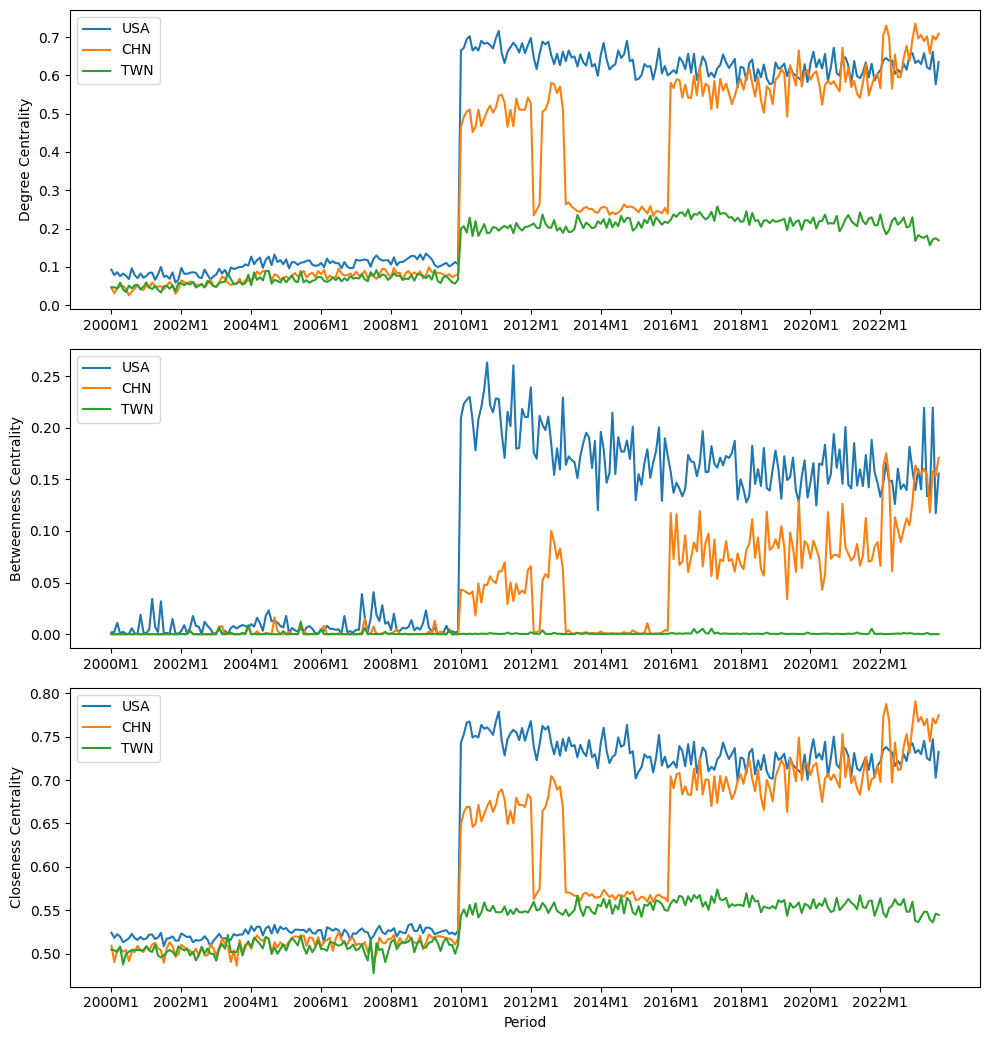

In [266]:

# Nodes of interest
nodes_of_interest = ['USA', 'CHN', 'TWN']

# Initialize lists to store centrality measures
degree_centrality_list = {node: [] for node in nodes_of_interest}
betweenness_centrality_list = {node: [] for node in nodes_of_interest}
closeness_centrality_list = {node: [] for node in nodes_of_interest}

# Iterate through the subsets
for subset_name, subset_graph in network_sets.items():
    # Extract the year and month from the subset name
    period = int(subset_name.split('_')[1])
    year = period // 100
    month = period % 100
    period_str = f"{year}M{month}"
    
    # Calculate centrality measures for each node of interest
    for node in nodes_of_interest:
        degree_centrality_list[node].append((period_str, nx.degree_centrality(subset_graph)[node]))
        betweenness_centrality_list[node].append((period_str, nx.betweenness_centrality(subset_graph)[node]))
        closeness_centrality_list[node].append((period_str, nx.closeness_centrality(subset_graph)[node]))

# Sort the lists based on the period
for node in nodes_of_interest:
    degree_centrality_list[node].sort(key=lambda x: x[0])
    betweenness_centrality_list[node].sort(key=lambda x: x[0])
    closeness_centrality_list[node].sort(key=lambda x: x[0])

# Create subplots for each centrality measure
fig, axs = plt.subplots(3, 1, figsize=(10, 10.5))

# Plot for degree centrality
for node in nodes_of_interest:
    axs[0].plot(*zip(*degree_centrality_list[node]), linestyle='-', label=node)
axs[0].set_ylabel('Degree Centrality')
axs[0].legend()

# Plot for betweenness centrality
for node in nodes_of_interest:
    axs[1].plot(*zip(*betweenness_centrality_list[node]), linestyle='-', label=node)
axs[1].set_ylabel('Betweenness Centrality')
axs[1].legend()

# Plot for closeness centrality
for node in nodes_of_interest:
    axs[2].plot(*zip(*closeness_centrality_list[node]), linestyle='-', label=node)
axs[2].set_xlabel('Period')
axs[2].set_ylabel('Closeness Centrality')
axs[2].legend()

# Show labels for every 24 periods
x_ticks = degree_centrality_list[nodes_of_interest[0]][::24]
for ax in axs:
    ax.set_xticks([x[0] for x in x_ticks])

plt.tight_layout()
plt.show()


### Visualization

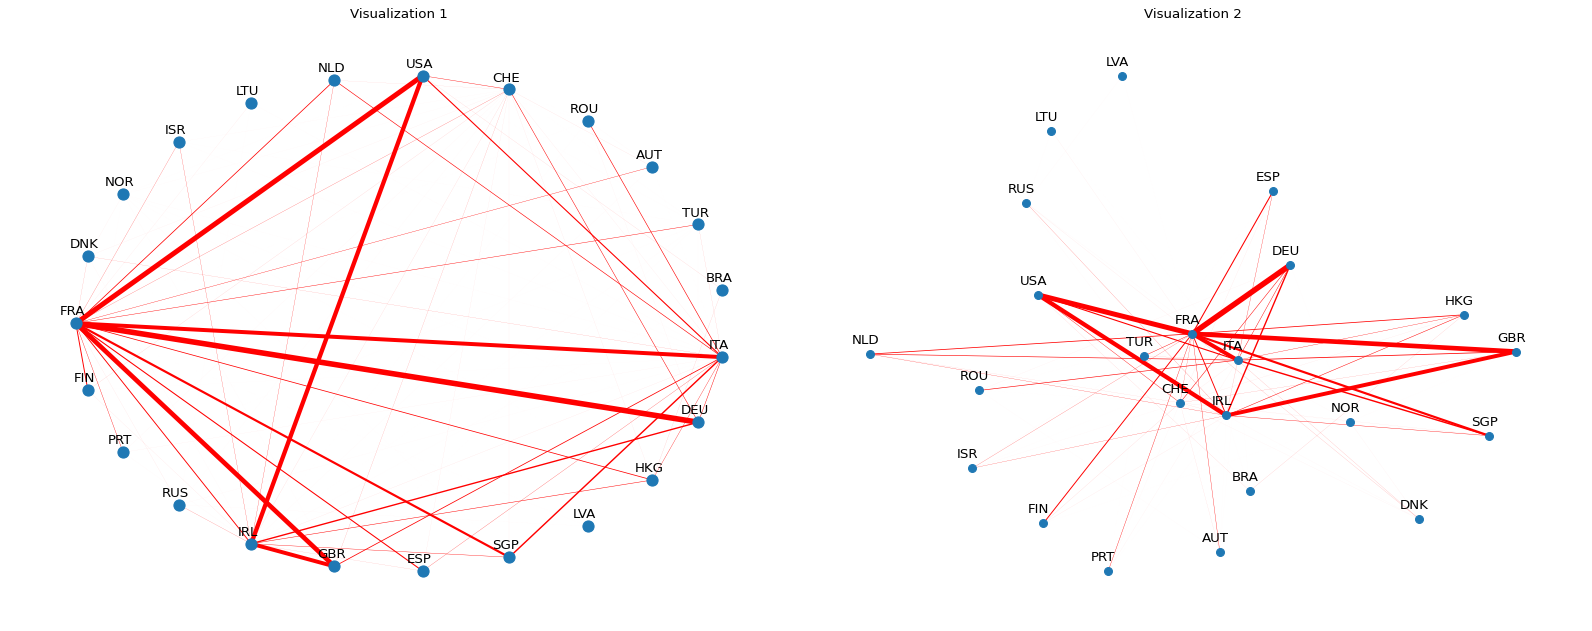

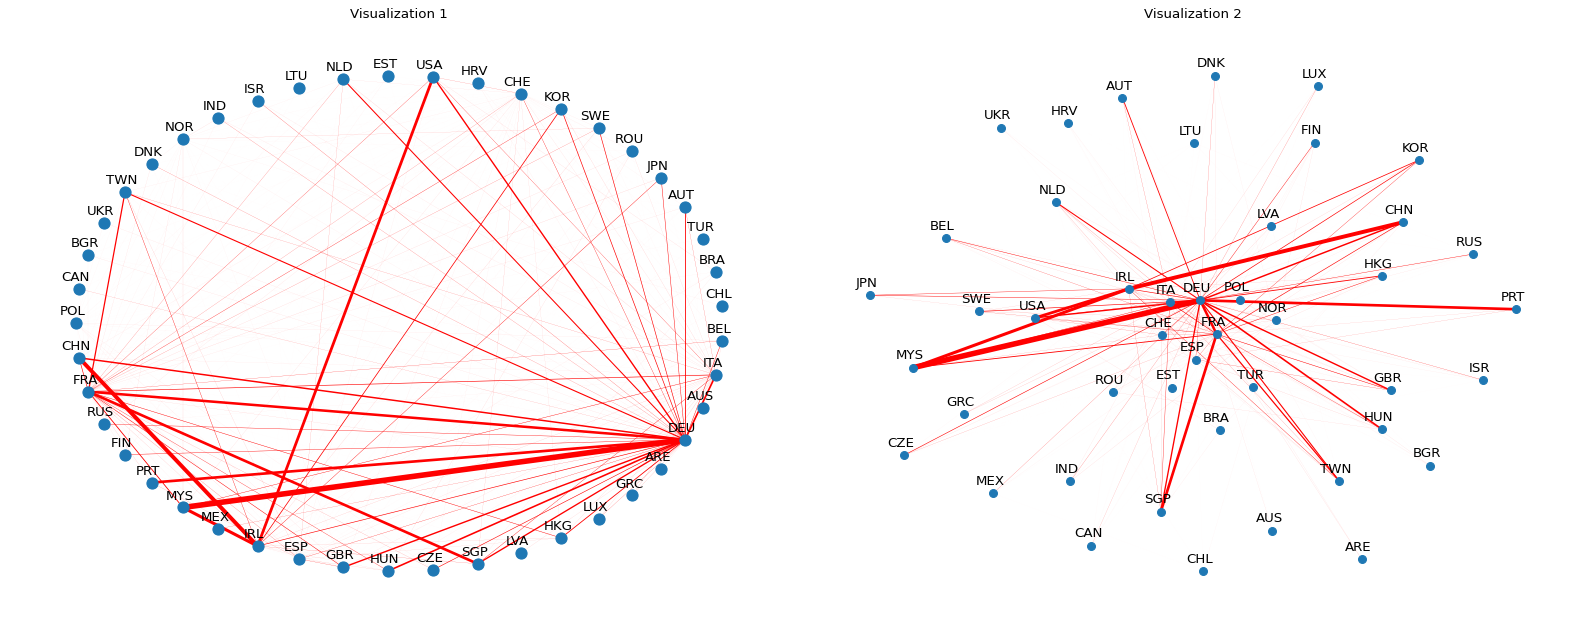

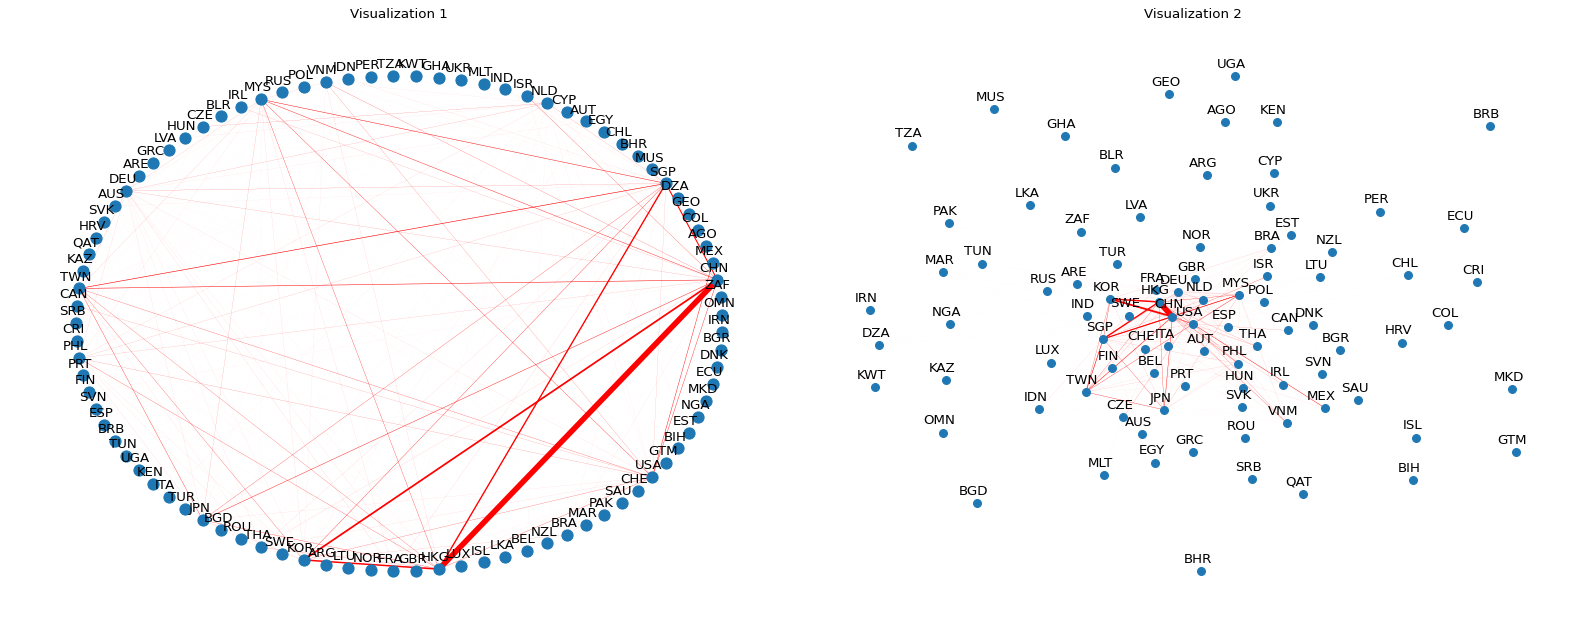

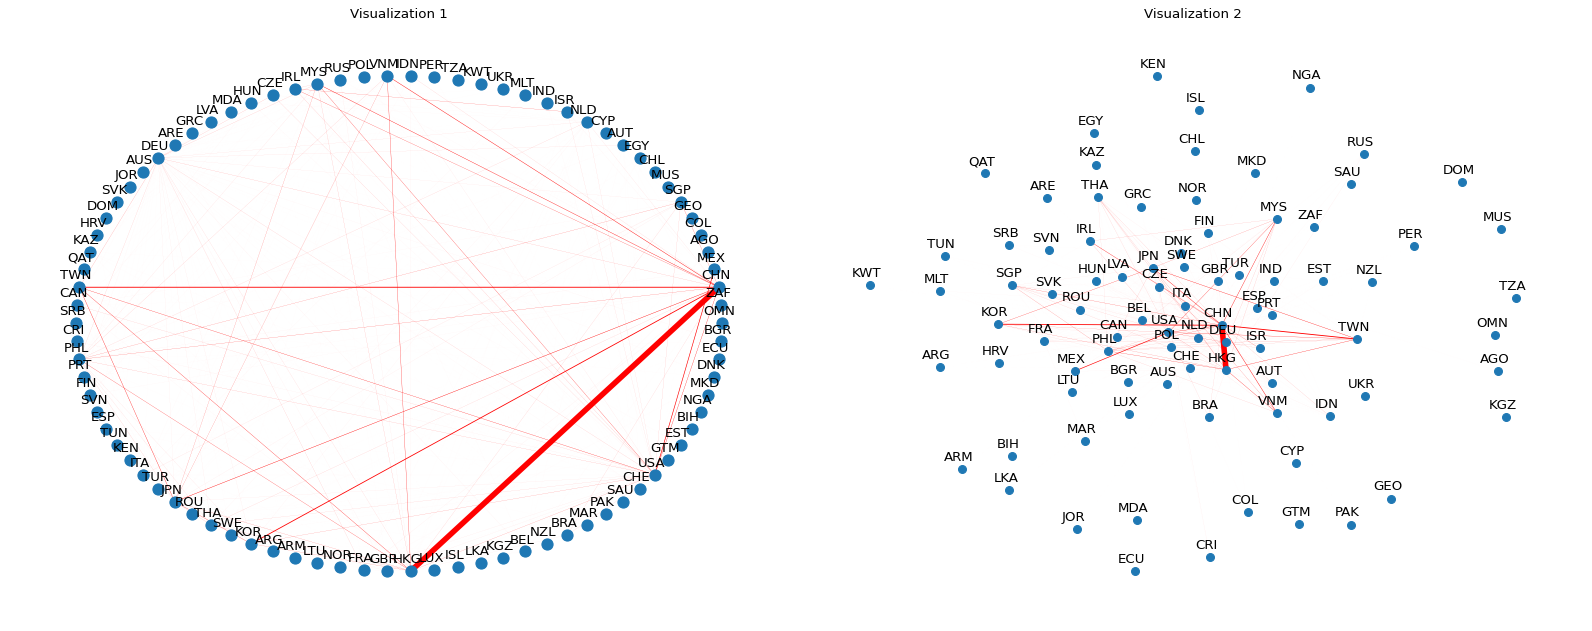

In [197]:
# Functions
def plot_network(G):
    # Calculate degree centrality for each node
    degree_centrality = nx.degree_centrality(G)
    
    # Define a threshold for degree centrality (adjust as needed)
    threshold = 0.05
    
    # Filter nodes with degree centrality above the threshold
    important_nodes = [node for node, centrality in degree_centrality.items() if centrality > threshold]
    
    # Create a subgraph with only important nodes and their edges
    G = G.subgraph(important_nodes)

    # Extract edge weights for scaling link widths
    edge_weights = [data['PrimaryValue'] for _, _, data in G.edges(data=True)]
    max_edge_weight = max(edge_weights)

    # Calculate normalized link widths based on weights
    edge_widths = [width / max_edge_weight * 5 for width in edge_weights]
    
    # Calculate node sizes based on degree centrality
    # node_sizes = [len(G[node]) * 10 for node in G.nodes()]

    # Set up colors for edges
    colors = [G[u][v].get('color', 'red') for u, v in G.edges()]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=80)

    # Visualization 1
    pos_attrs1 = {}
    circPos1 = nx.shell_layout(G)
    for node, coords in circPos1.items():
        pos_attrs1[node] = (coords[0] + 0.01, coords[1] - 0.05)
    nx.draw_networkx_labels(G, pos=circPos1, ax=axes[0])
    nx.draw(G, pos=pos_attrs1, node_size=100, ax=axes[0], edge_color=colors, width=edge_widths)
    axes[0].set_title('Visualization 1')

    # Visualization 2
    pos_attrs2 = {}
    circPos2 = nx.spring_layout(G, k=0.2, iterations=20)
    for node, coords in circPos2.items():
        pos_attrs2[node] = (coords[0] + 0.01, coords[1] - 0.05)
    nx.draw_networkx_labels(G, pos=circPos2, ax=axes[1])
    nx.draw(G, pos=pos_attrs2, node_size=50, ax=axes[1], edge_color=colors, width=edge_widths)
    axes[1].set_title('Visualization 2')

    plt.tight_layout()
    plt.show()

# Big increase in 2010M1
# plot_network(G_200001)
plot_network(network_sets['period_200001'])
plot_network(network_sets['period_200801'])
plot_network(network_sets['period_201701'])
plot_network(network_sets['period_202301'])

#### Community

Communities:
Community 1: ['CRI', 'CHN', 'CMR', 'MHL', 'TCD', 'RWA', 'SLV', 'AGO', 'COL', 'BRB', 'GEO', 'TKM', 'DZA', 'TUN', 'URY', 'MUS', 'MMR', 'CIV', 'VEN', 'ABW', 'BHR', 'AFG', 'TGO', 'JAM', 'MDV', 'ITA', 'MAC', 'PSE', 'GUY', 'TUR', 'BGD', 'UZB', 'BTN', 'COG', 'SXM', 'SUR', 'ETH', 'ARM', 'NLD', 'IND', 'GHA', 'SLE', 'KWT', 'PNG', 'ATF', 'BMU', 'SYC', 'TZA', 'GIN', 'LBY', 'KNA', 'LAO', 'SMR', 'RUS', 'TTO', 'YEM', 'LBR', 'BLR', 'NPL', 'MDA', 'VGB', 'CUW', 'BFA', 'BES', 'HKG', 'PAN', 'MOZ', 'GAB', 'LBN', 'DEU', 'SEN', 'BHS', 'LKA', 'KGZ', 'JOR', 'CYM', 'MAR', 'BRN', 'ATG', 'AZE', 'CPV', 'PRY', 'PAK', 'DOM', 'BOL', 'USA', 'KAZ', 'QAT', 'PYF', 'BIH', 'KHM', 'SYR', 'MDG', 'ECU', 'COD', 'HTI', 'IRN', 'IRQ', 'OMN', 'ERI']
Community 2: ['SRB', 'UMI', 'VNM', 'PHL', 'FRA', 'FIN', 'PRT', 'FJI', 'MYS', 'MEX', 'BEN', 'SVN', 'IRL', 'GBR', 'HUN', 'SGP', 'LVA', 'LUX', 'TLS', 'SLB', 'GRC', 'GRL', 'ARE', 'ISL', 'AUS', 'BEL', 'NZL', 'BRA', 'SVK', 'AUT', 'JPN', 'ROU', 'THA', 'SWE', 'KOR', 'NCL', 'SAU', 

/var/folders/pj/59k0gxhn4sn0yrsml90mvxnr0000gn/T/ipykernel_42214/2441643796.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('viridis'))
/var/folders/pj/59k0gxhn4sn0yrsml90mvxnr0000gn/T/ipykernel_42214/2441643796.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=[], orientation='vertical')


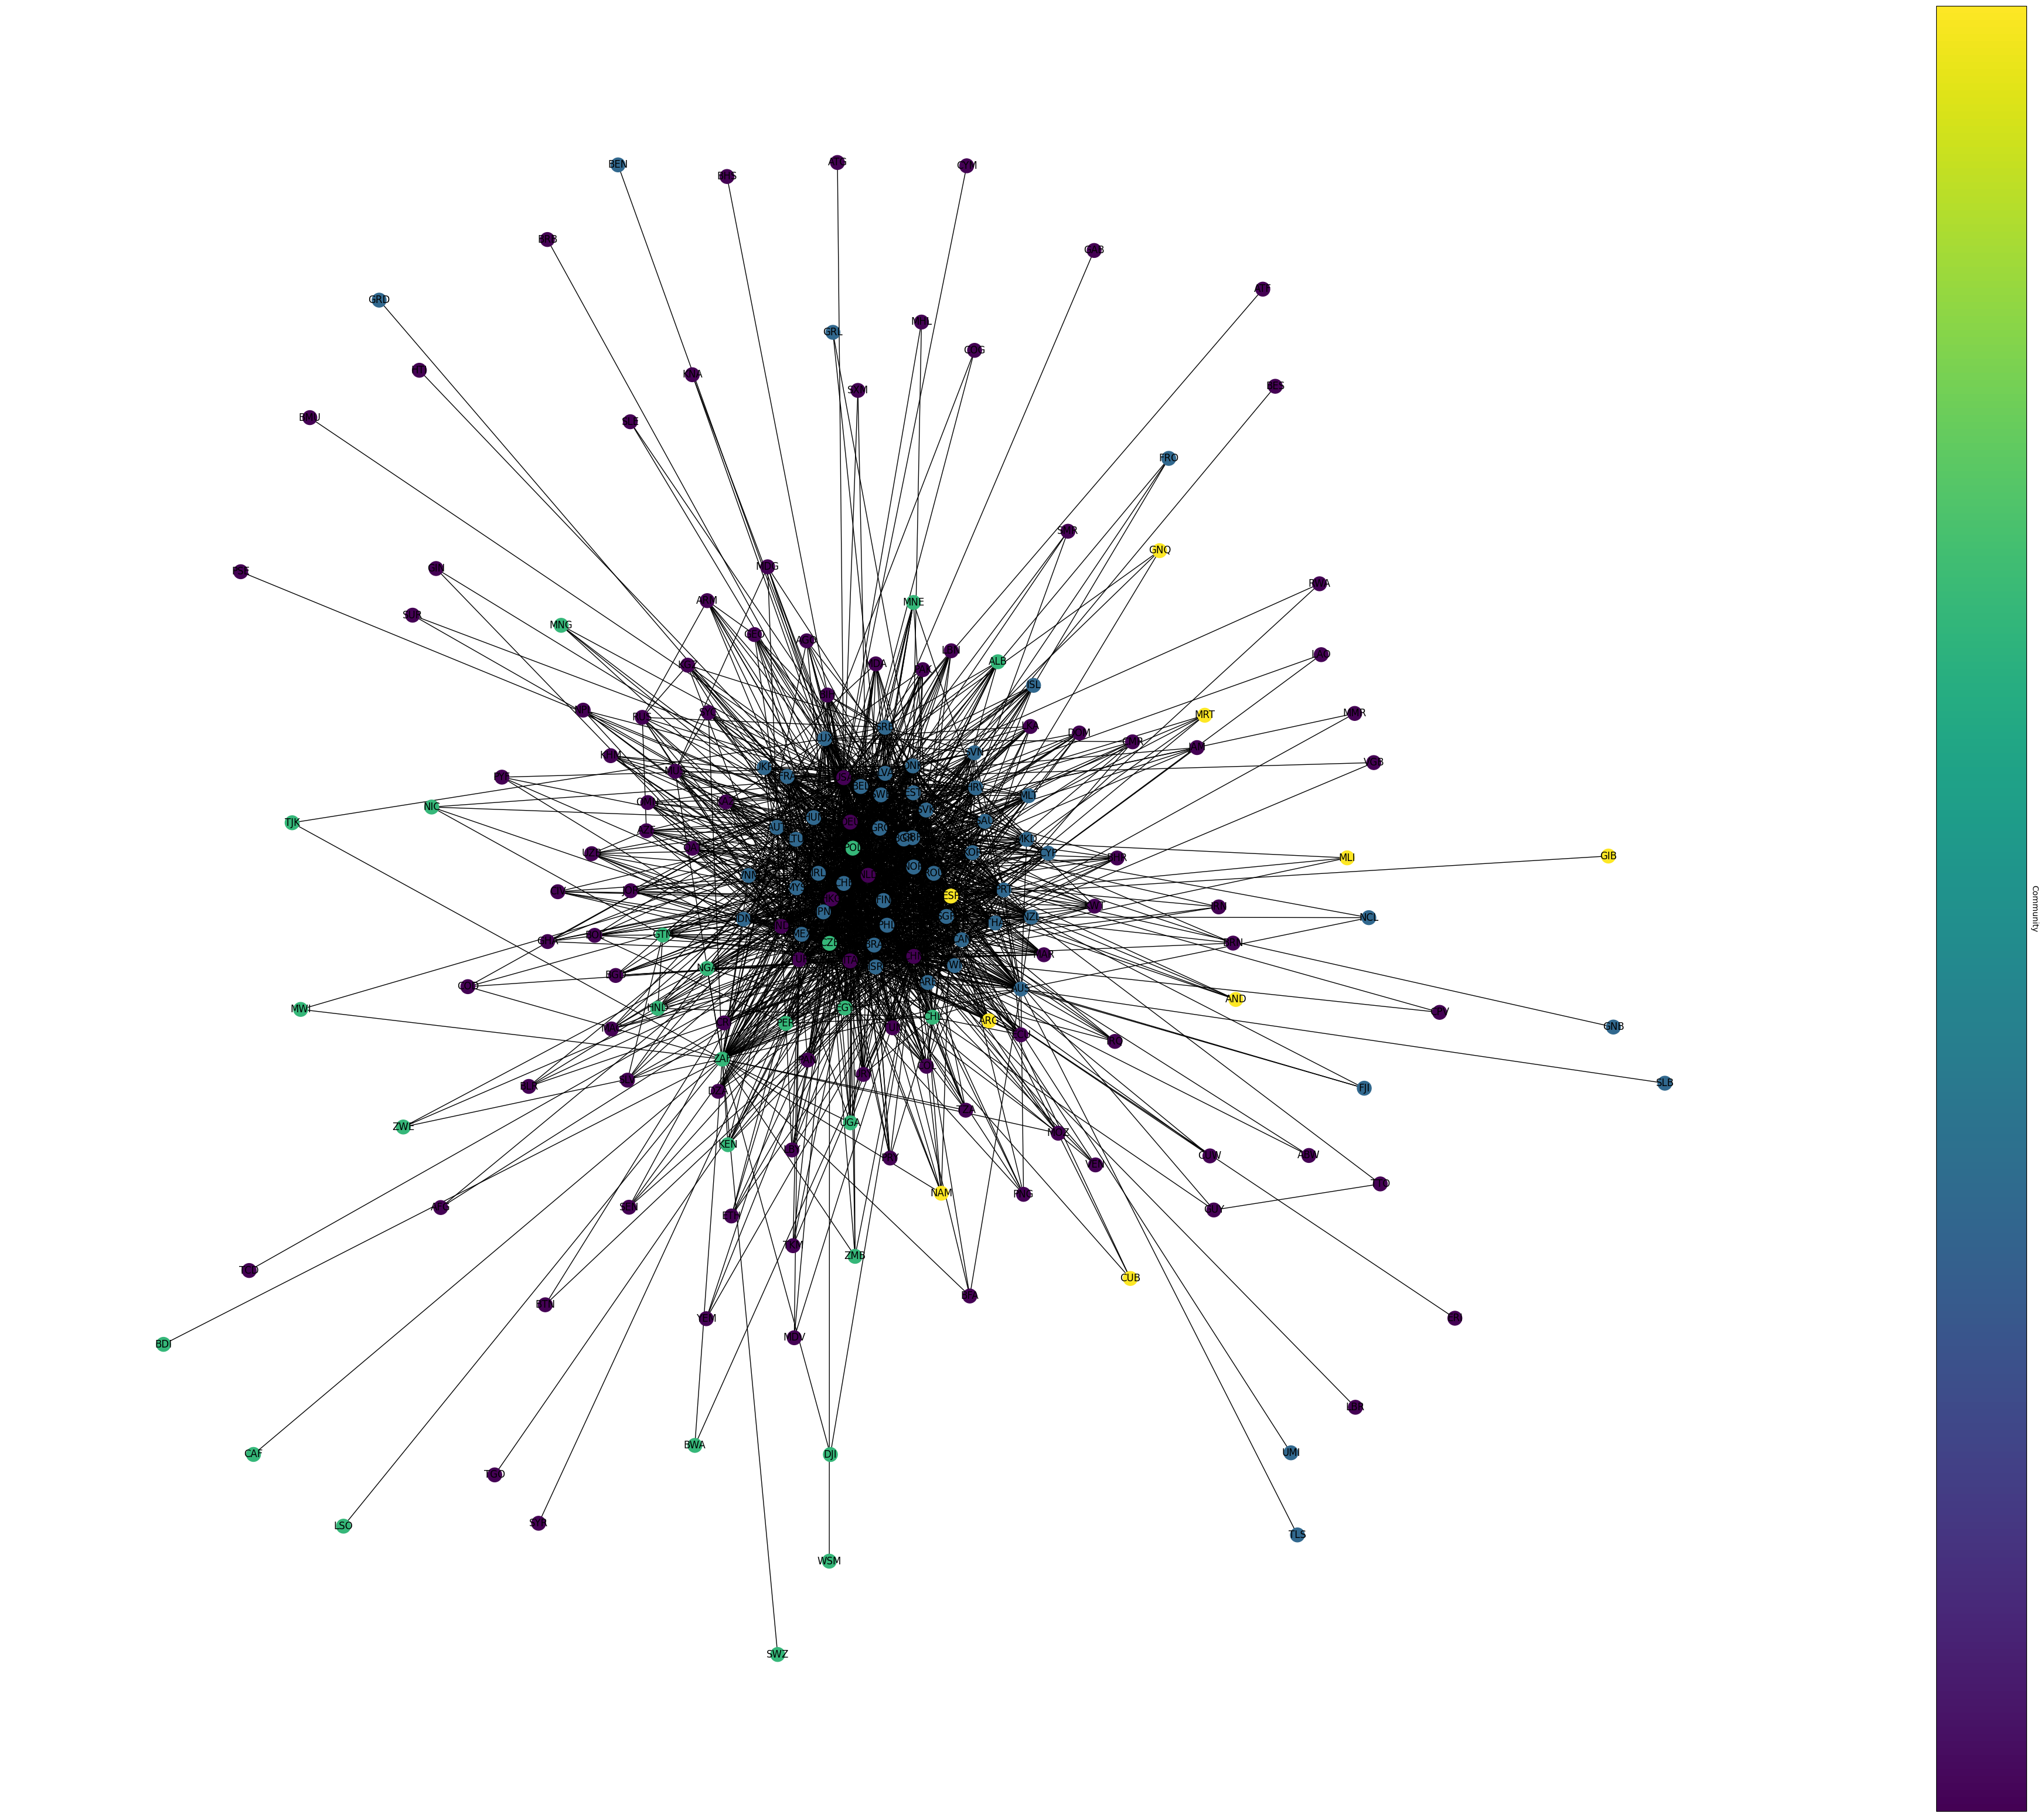

In [215]:
G = network_sets['period_202309']
# Community Detection using Louvain Modularity
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
print("Communities:")
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {list(community)}")

# Assign colors to nodes based on community membership
color_map = {}
for i, community in enumerate(communities):
    color_map.update({node: i for node in community})

# Set a larger figure size
fig, ax = plt.subplots(figsize=(50, 40))

# Plot the graph with nodes colored by community
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=[color_map[node] for node in G.nodes], cmap=plt.colormaps.get_cmap('viridis'), with_labels=True, ax=ax)

# Add a colorbar legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('viridis'))
sm.set_array([])
cbar = plt.colorbar(sm, ticks=[], orientation='vertical')
cbar.set_label('Community', rotation=270, labelpad=15)

plt.show()


### Degree distribution - example

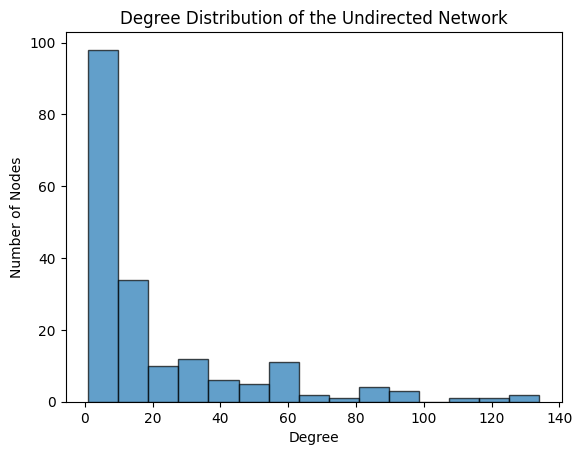

In [216]:
# Calculate the degree distribution
degree_sequence = [degree for node, degree in network_sets['period_202309'].degree()]

# Plot the degree distribution
plt.hist(degree_sequence, bins='auto', edgecolor='black', alpha=0.7)
plt.title("Degree Distribution of the Undirected Network")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()